In [3]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


Cargar dataset iris


In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class label: ', np.unique(y))

Class label:  [0 1 2]


Separar training y test


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1,stratify=y)

Verificar contador de valores unicos

In [6]:
print('Contador etiqueta y: ', np.bincount(y))
print('Contador etiqueta y train: ', np.bincount(y_train))
print('Contador etiqueta y test: ', np.bincount(y_test))

Contador etiqueta y:  [50 50 50]
Contador etiqueta y train:  [35 35 35]
Contador etiqueta y test:  [15 15 15]


transformar el modelo con StandarScaler

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Modelando

In [11]:
ppn = Perceptron(max_iter=40, eta0=0.1, tol= 1e-3, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Numero equivocado de clasificaciones: ',(y_test != y_pred).sum())
print('Accuracy de Perceptron: %.2f' %((y_test == y_pred).sum()/len(y_test)))

Numero equivocado de clasificaciones:  1
Accuracy de Perceptron: 0.98


Verificar el Accuracy usando sklearn

In [12]:
print('Accuracy con SKLEARN: %.2f' %(accuracy_score(y_test, y_pred)))

Accuracy con SKLEARN: 0.98


Funcion para grafico

In [13]:
def plot_decision_regions(X,y,classifier, test_idx = None, resolution= 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #dibujar el perimetro de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                   alpha = 0.8, c = colors[idx],    # alpha : size of marker
                   marker = markers[idx], label = cl,
                   edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c = '', edgecolor = 'black', alpha = 1,
                   s = 100, label = 'test set')
    

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_148\958982660.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 

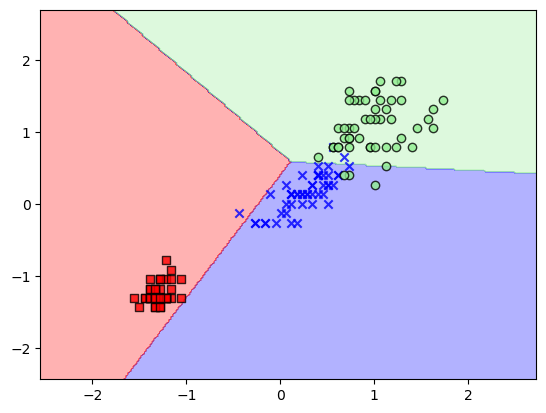

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std)) # vlookup combine
y_combined_std = np.hstack((y_train, y_test))  # hlookup combine
plot_decision_regions(X_combined_std, y_combined_std,
                    classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [16]:
ppn = SGDClassifier(loss = 'perceptron', random_state = 1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Numero de muestras clasificadas incorrectas :', (y_test != y_pred).sum())
print('Accuracy de Perceptron : %.2f' %((y_test == y_pred).sum() / len(y_test)))


Numero de muestras clasificadas incorrectas : 3
Accuracy de Perceptron : 0.93


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_148\958982660.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 

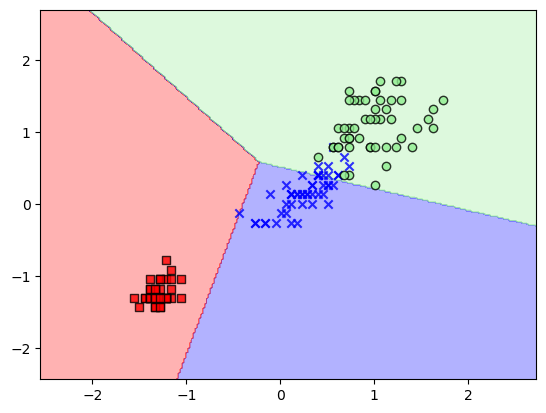

In [17]:
plot_decision_regions(X_combined_std, y_combined_std,
                    classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()